In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from scipy import stats
from scipy.stats import randint

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [0]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from  sklearn.model_selection import cross_val_score

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV


In [0]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [0]:
pip install six

In [0]:
#Naive bayes
from sklearn.naive_bayes import GaussianNB 
#Stacking
from mlxtend.classifier import StackingClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#reading in CSV's from a file path
train_df = pd.read_csv('/content/gdrive/My Drive/data_adult.txt', sep="\t", encoding="utf-8")


In [0]:
testdf= pd.read_csv('/content/gdrive/My Drive/adult_test.txt', sep=",", encoding="utf-8")

In [0]:
print(train_df.shape)
testdf.isnull().sum().max() #just checking that there's no missing data missing...
testdf.head(5)

(32561, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50k
4,18,Private,103497,Some-college,10,Never-married,Machine-op-inspct,Own-child,White,Female,0,0,30,United-States,<=50K


In [0]:
print(train_df.describe())

                age        fnlwgt  ...  capital_loss  hours_per_week
count  32561.000000  3.256100e+04  ...  32561.000000    32561.000000
mean      38.581647  1.897784e+05  ...     87.303830       40.437456
std       13.640433  1.055500e+05  ...    402.960219       12.347429
min       17.000000  1.228500e+04  ...      0.000000        1.000000
25%       28.000000  1.178270e+05  ...      0.000000       40.000000
50%       37.000000  1.783560e+05  ...      0.000000       40.000000
75%       48.000000  2.370510e+05  ...      0.000000       45.000000
max       90.000000  1.484705e+06  ...   4356.000000       99.000000

[8 rows x 6 columns]


In [0]:
print(testdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 15 columns):
age               47 non-null int64
workclass         47 non-null object
fnlwgt            47 non-null int64
education         47 non-null object
education_num     47 non-null int64
marital_status    47 non-null object
occupation        47 non-null object
relationship      47 non-null object
race              47 non-null object
sex               47 non-null object
capital_gain      47 non-null int64
capital_loss      47 non-null int64
hours_per_week    47 non-null int64
native_country    47 non-null object
target            47 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ KB
None


In [0]:
testdf

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50k
4,18,Private,103497,Some-college,10,Never-married,Machine-op-inspct,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,227026,HS-grad,9,Never-married,Other-service,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [0]:
train_df.isnull().sum().max() #just checking that there's no missing data missing...
train_df.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
train_df.var()

age               1.860614e+02
fnlwgt            1.114080e+10
education_num     6.618890e+00
capital_gain      5.454254e+07
capital_loss      1.623769e+05
hours_per_week    1.524590e+02
dtype: float64

In [0]:
for k in train_df.keys():
    print('{0}: {1}'.format(k, len(train_df[k].unique())))

age: 73
workclass: 9
fnlwgt: 21648
education: 16
education_num: 16
marital_status: 7
occupation: 15
relationship: 6
race: 5
sex: 2
capital_gain: 119
capital_loss: 92
hours_per_week: 94
native_country: 42
target: 2


In [0]:
for k in train_df.keys():
    if len(train_df[k].unique())<=15:
        print(k)

workclass
marital_status
occupation
relationship
race
sex
target


In [0]:
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

In [0]:
stringFeatures = ['education','workclass','marital_status','occupation','relationship','race','sex',"native_country","target"]

In [0]:
intFeatures = ['age','education_num','capital_gain','capital_loss','hours_per_week','fnlwgt']

In [0]:
floatFeatures = []

In [0]:
# Clean the NaN's
for feature in train_df:
    if feature in intFeatures:
        train_df[feature] = train_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        train_df[feature] = train_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        train_df[feature] = train_df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
train_df.head(10)  

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [0]:
pip install pyAgrum

In [0]:
import pandas
import os
import math
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from pyAgrum.lib.bn2roc import showROC
from sklearn.tree import DecisionTreeClassifier
import sklearn.datasets as datasets
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz


In [0]:
train_df['age'].fillna(train_df['age'].median(), inplace = True)


In [0]:
s = pd.Series(train_df['age'])
s[s<18] = train_df['age'].median()
train_df['age'] = s
s = pd.Series(train_df['age'])
s[s>90] = train_df['age'].median()
train_df['age'] = s

In [0]:
s = pd.Series(testdf['age'])
s[s<18] = testdf['age'].median()
testdf['age'] = s
s = pd.Series(testdf['age'])
s[s>90] = testdf['age'].median()
testdf['age'] = s

In [0]:
train_df['age_range'] = pd.cut(train_df['age'], [0,20,30,65,90], labels=["0-20", "21-30", "31-65", "66-90"], include_lowest=True)


In [0]:
testdf['age_range'] = pd.cut(testdf['age'], [0,20,30,65,90], labels=["0-20", "21-30", "31-65", "66-90"], include_lowest=True)

In [0]:
gender = train_df['sex'].str.lower()
print(gender)

0           male
1           male
2           male
3           male
4         female
          ...   
32556     female
32557       male
32558     female
32559       male
32560     female
Name: sex, Length: 32561, dtype: object


In [0]:
gender = train_df['sex'].unique()
print(gender)

[' Male' ' Female']


In [0]:

import csv
train_df.to_csv(os.path.join('/content/gdrive/My Drive/train_data2.csv'), index=False)

In [0]:
train_df.var()


age               1.803824e+02
fnlwgt            1.114080e+10
education_num     6.618890e+00
capital_gain      5.454254e+07
capital_loss      1.623769e+05
hours_per_week    1.524590e+02
dtype: float64

In [0]:
for k in testdf.keys():
    if len(testdf[k].unique())<=15:
        print(k)

workclass
education
education_num
marital_status
occupation
relationship
race
sex
capital_gain
capital_loss
native_country
target
age_range


In [0]:
bn = gum.BayesNet("Adulte")
bn =gum.fastBN("age_range{0-20|21-30|31-65|66-90}<-target{<=50K|>50K}->sex{ Female| Male};relationship{ Wife| Own-child| Husband| Not-in-family| Other-relative| Unmarried}<-target->race{ White| Asian-Pac-Islander| Amer-Indian-Eskimo| Other| Black};workclass{ Private| Self-emp-not-inc| Self-emp-inc| Federal-gov| Local-gov| State-gov| Without-pay| Never-worked}<-target->marital_status{ Married-civ-spouse| Divorced| Never-married| Separated| Widowed| Married-spouse-absent| Married-AF-spouse};occupation{ Tech-support| Craft-repair| Other-service| Sales| Exec-managerial| Prof-specialty| Handlers-cleaners| Machine-op-inspct| Adm-clerical| Farming-fishing| Transport-moving| Priv-house-serv| Protective-serv| Armed-Forces}<-target")
print(bn.variable("target"))
print(bn.variable("age_range"))
print(bn.variable("sex"))
print(bn.variable("race"))
print(bn.variable("workclass"))
print(bn.variable("relationship"))
print(bn.variable("marital_status"))
print(bn.variable("occupation"))

bn

target<<=50K,>50K>
age_range<0-20,21-30,31-65,66-90>
sex< Female, Male>
race< White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black>
workclass< Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked>
relationship< Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried>
marital_status< Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse>
occupation< Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces>


(gum::BayesNet<double>@0x4e43000) BN{nodes: 8, arcs: 7, domainSize: 376320, dim: 94}

In [0]:
bn.cpt('target')[:] = [100, 1]
bn.cpt('target').normalizeAsCPT()
bn.cpt('target')

(gum::Potential<double>@0x519b820) <target:<=50K> :: 0.990099 /<target:>50K> :: 0.00990099

In [0]:
bn.cpt('sex')[0:] = [ 1, 10]
bn.cpt('sex')[1:] = [ 10, 1]
bn.cpt('sex').normalizeAsCPT()
bn.cpt('sex')

(gum::Potential<double>@0x519b560) <sex: Female|target:<=50K> :: 0.0909091 /<sex: Male|target:<=50K> :: 0.909091 /<sex: Female|target:>50K> :: 0.909091 /<sex: Male|target:>50K> :: 0.0909091

In [0]:
bn.cpt('age_range')[0:] = [ 1, 1, 10, 10]
bn.cpt('age_range')[1:] = [ 10, 10, 1, 1]
bn.cpt('age_range').normalizeAsCPT()
bn.cpt('age_range')

(gum::Potential<double>@0x519a260) <age_range:0-20|target:<=50K> :: 0.0454545 /<age_range:21-30|target:<=50K> :: 0.0454545 /<age_range:31-65|target:<=50K> :: 0.454545 /<age_range:66-90|target:<=50K> :: 0.454545 /<age_range:0-20|target:>50K> :: 0.454545 /<age_range:21-30|target:>50K> :: 0.454545 /<age_range:31-65|target:>50K> :: 0.0454545 /<age_range:66-90|target:>50K> :: 0.0454545

In [0]:
bn.cpt('race')[0:] = [ 1, 1,1,10, 10]
bn.cpt('race')[1:] = [ 10, 10,1,1, 1]
bn.cpt('race').normalizeAsCPT()
bn.cpt('race')

(gum::Potential<double>@0x519bd80) <race: White|target:<=50K> :: 0.0434783 /<race: Asian-Pac-Islander|target:<=50K> :: 0.0434783 /<race: Amer-Indian-Eskimo|target:<=50K> :: 0.0434783 /<race: Other|target:<=50K> :: 0.434783 /<race: Black|target:<=50K> :: 0.434783 /<race: White|target:>50K> :: 0.434783 /<race: Asian-Pac-Islander|target:>50K> :: 0.434783 /<race: Amer-Indian-Eskimo|target:>50K> :: 0.0434783 /<race: Other|target:>50K> :: 0.0434783 /<race: Black|target:>50K> :: 0.0434783

In [0]:
bn.cpt('workclass')[0:] = [ 1, 1, 1, 1,10,10,10,10]
bn.cpt('workclass')[1:] = [ 10, 10, 10, 10,1,1,1,1]
bn.cpt('workclass').normalizeAsCPT()
bn.cpt('workclass')

(gum::Potential<double>@0x519a2e0) <workclass: Private|target:<=50K> :: 0.0227273 /<workclass: Self-emp-not-inc|target:<=50K> :: 0.0227273 /<workclass: Self-emp-inc|target:<=50K> :: 0.0227273 /<workclass: Federal-gov|target:<=50K> :: 0.0227273 /<workclass: Local-gov|target:<=50K> :: 0.227273 /<workclass: State-gov|target:<=50K> :: 0.227273 /<workclass: Without-pay|target:<=50K> :: 0.227273 /<workclass: Never-worked|target:<=50K> :: 0.227273 /<workclass: Private|target:>50K> :: 0.227273 /<workclass: Self-emp-not-inc|target:>50K> :: 0.227273 /<workclass: Self-emp-inc|target:>50K> :: 0.227273 /<workclass: Federal-gov|target:>50K> :: 0.227273 /<workclass: Local-gov|target:>50K> :: 0.0227273 /<workclass: State-gov|target:>50K> :: 0.0227273 /<workclass: Without-pay|target:>50K> :: 0.0227273 /<workclass: Never-worked|target:>50K> :: 0.0227273

In [0]:
bn.cpt('relationship')[0:] = [ 1, 1, 1,10,10,10]
bn.cpt('relationship')[1:] = [ 10, 10, 10,1,1,1]
bn.cpt('relationship').normalizeAsCPT()
bn.cpt('relationship')

(gum::Potential<double>@0x519af80) <relationship: Wife|target:<=50K> :: 0.030303 /<relationship: Own-child|target:<=50K> :: 0.030303 /<relationship: Husband|target:<=50K> :: 0.030303 /<relationship: Not-in-family|target:<=50K> :: 0.30303 /<relationship: Other-relative|target:<=50K> :: 0.30303 /<relationship: Unmarried|target:<=50K> :: 0.30303 /<relationship: Wife|target:>50K> :: 0.30303 /<relationship: Own-child|target:>50K> :: 0.30303 /<relationship: Husband|target:>50K> :: 0.30303 /<relationship: Not-in-family|target:>50K> :: 0.030303 /<relationship: Other-relative|target:>50K> :: 0.030303 /<relationship: Unmarried|target:>50K> :: 0.030303

In [0]:
bn.cpt('marital_status')[0:] = [ 1, 1, 1,1,10,10,10]
bn.cpt('marital_status')[1:] = [ 10, 10, 10,10,1,1,1]
bn.cpt('marital_status').normalizeAsCPT()
bn.cpt('marital_status')

(gum::Potential<double>@0x519b2e0) <marital_status: Married-civ-spouse|target:<=50K> :: 0.0294118 /<marital_status: Divorced|target:<=50K> :: 0.0294118 /<marital_status: Never-married|target:<=50K> :: 0.0294118 /<marital_status: Separated|target:<=50K> :: 0.0294118 /<marital_status: Widowed|target:<=50K> :: 0.294118 /<marital_status: Married-spouse-absent|target:<=50K> :: 0.294118 /<marital_status: Married-AF-spouse|target:<=50K> :: 0.294118 /<marital_status: Married-civ-spouse|target:>50K> :: 0.232558 /<marital_status: Divorced|target:>50K> :: 0.232558 /<marital_status: Never-married|target:>50K> :: 0.232558 /<marital_status: Separated|target:>50K> :: 0.232558 /<marital_status: Widowed|target:>50K> :: 0.0232558 /<marital_status: Married-spouse-absent|target:>50K> :: 0.0232558 /<marital_status: Married-AF-spouse|target:>50K> :: 0.0232558

In [0]:
bn.cpt('occupation')[0:] = [ 1, 1, 1,1,1,1,1,10,10,10,10,10,10,10]
bn.cpt('occupation')[1:] = [ 10, 10,10,10,10,10,10,1,1,1,1,1,1,1]
bn.cpt('occupation').normalizeAsCPT()
bn.cpt('occupation')

(gum::Potential<double>@0x519bc60) <occupation: Tech-support|target:<=50K> :: 0.012987 /<occupation: Craft-repair|target:<=50K> :: 0.012987 /<occupation: Other-service|target:<=50K> :: 0.012987 /<occupation: Sales|target:<=50K> :: 0.012987 /<occupation: Exec-managerial|target:<=50K> :: 0.012987 /<occupation: Prof-specialty|target:<=50K> :: 0.012987 /<occupation: Handlers-cleaners|target:<=50K> :: 0.012987 /<occupation: Machine-op-inspct|target:<=50K> :: 0.12987 /<occupation: Adm-clerical|target:<=50K> :: 0.12987 /<occupation: Farming-fishing|target:<=50K> :: 0.12987 /<occupation: Transport-moving|target:<=50K> :: 0.12987 /<occupation: Priv-house-serv|target:<=50K> :: 0.12987 /<occupation: Protective-serv|target:<=50K> :: 0.12987 /<occupation: Armed-Forces|target:<=50K> :: 0.12987 /<occupation: Tech-support|target:>50K> :: 0.12987 /<occupation: Craft-repair|target:>50K> :: 0.12987 /<occupation: Other-service|target:>50K> :: 0.12987 /<occupation: Sales|target:>50K> :: 0.12987 /<occupation: Exec-managerial|target:>50K> :: 0.12987 /<occupation: Prof-specialty|target:>50K> :: 0.12987 /<occupation: Handlers-cleaners|target:>50K> :: 0.12987 /<occupation: Machine-op-inspct|target:>50K> :: 0.012987 /<occupation: Adm-clerical|target:>50K> :: 0.012987 /<occupation: Farming-fishing|target:>50K> :: 0.012987 /<occupation: Transport-moving|target:>50K> :: 0.012987 /<occupation: Priv-house-serv|target:>50K> :: 0.012987 /<occupation: Protective-serv|target:>50K> :: 0.012987 /<occupation: Armed-Forces|target:>50K> :: 0.012987

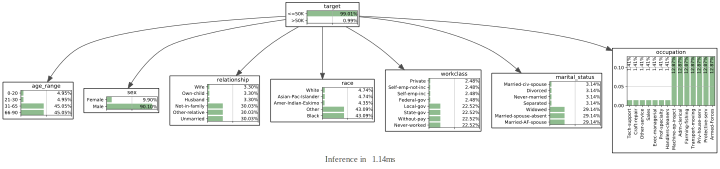

In [0]:
gnb.showInference(bn,size="10")

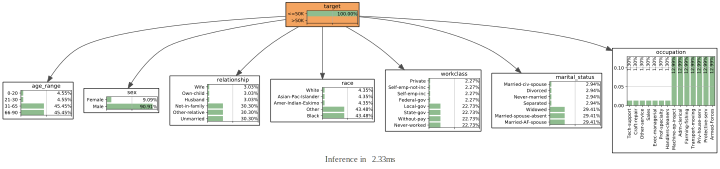

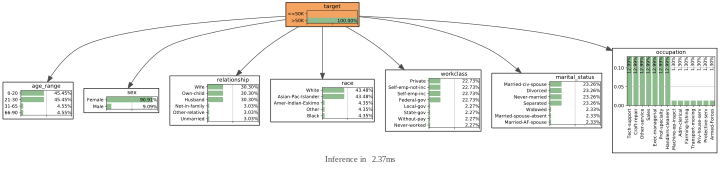

In [0]:
gnb.showInference(bn,size="10", evs={'target':'<=50K'})
gnb.showInference(bn,size="10", evs={'target':'>50K'})

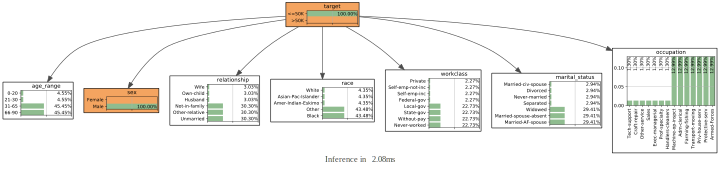

In [0]:
 gnb.showInference(bn,size="10", evs={'target':'<=50K', 'sex':' Male'})

In [0]:
male_str=[" ?"]
for (row, col) in train_df.iterrows():

    if str.lower(col.occupation) in male_str:
        train_df['occupation'].replace(to_replace=col.occupation, value=' Sales', inplace=True)
    if str.lower(col.workclass) in male_str:
        train_df['workclass'].replace(to_replace=col.workclass, value=' Private', inplace=True)

In [0]:
ie=gum.LazyPropagation(bn)

def init_belief(engine):
    # Initialize evidence
    for var in engine.BN().names():
        if var != 'target':
            engine.addEvidence(var, 0)

def update_beliefs(engine, bayesNet, row):
    # Update beliefs from a given row less the Survived variable
    for var in bayesNet.names():
        if var == "target":
            continue
        try:
            label = str(row.to_dict()[var])
            idx = bayesNet.variable(var).index(str(row.to_dict()[var]))
            engine.chgEvidence(var, idx)
        except gum.NotFound:
            # this can happend when value is missing is the test base.
            pass        
    engine.makeInference()
    
def is_well_predicted(engine, bayesNet, auc, row):
    update_beliefs(engine, bayesNet, row)
    marginal = engine.posterior('target')
    outcome = row.to_dict()['target']
    if outcome == "False": # Did not survived
        if marginal.toarray()[1] < auc:
            return "True Positive"
        else:
            return "False Negative"
    else: # Survived
        if marginal.toarray()[1] >= auc:
            return "True Negative"
        else:
            return "False Positive"

init_belief(ie)
ie.addTarget('target')
result = train_df.apply(lambda x: is_well_predicted(ie, bn, 0.5, x), axis=1)
result.value_counts(True)

True Negative     0.614416
False Positive    0.385584
dtype: float64

In [0]:
positives = sum(result.map(lambda x: 1 if x.startswith("True") else 0 ))
total = result.count()
print("{0:.2f}% good predictions".format(positives/total*100))

61.44% good predictions


In [0]:
df = pandas.read_csv(os.path.join('res', 'titanic', '/content/gdrive/My Drive/train_data2.csv'))

for k in train_df.keys():
    print('{0}: {1}'.format(k, len(train_df[k].unique())))

age: 72
workclass: 8
fnlwgt: 21648
education: 16
education_num: 16
marital_status: 7
occupation: 14
relationship: 6
race: 5
sex: 2
capital_gain: 119
capital_loss: 92
hours_per_week: 94
native_country: 42
target: 2
age_range: 4


In [0]:
template=gum.BayesNet()
template.add(gum.LabelizedVariable("target", "target", ['<=50K', '>50K']))
template.add(gum.LabelizedVariable("sex", "sex",['Male','Female']))
template.add(gum.LabelizedVariable("age_range", "age_range",['0-20','21-30','31-65','66-90']))
template.add(gum.LabelizedVariable("race", "race",['White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'Black']))
template.add(gum.LabelizedVariable("workclass", "workclass",['Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov', 'Without-pay', 'Never-worked']))
template.add(gum.LabelizedVariable("relationship", "relationship", ['Wife', 'Own-child', 'Husband', 'Not-in-family', 'Other-relative', 'Unmarried']))
template.add(gum.LabelizedVariable("marital_status", "marital_status", ['Married-civ-spouse', 'Divorced', 'Never-married', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse'])) 
template.add(gum.LabelizedVariable("occupation", "occupation",['Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing', 'Transport-moving', 'Priv-house-serv', 'Protective-serv', 'Armed-Forces']))            
gnb.showBN(template)

In [0]:
train_df.to_csv(os.path.join('/content/gdrive/My Drive/train_data2.csv'), index=False)
file = os.path.join('res', 'titanic', '/content/gdrive/My Drive/train_data2.csv')

learner = gum.BNLearner(file, template)
bn = learner.learnBN()
bn

(gum::BayesNet<double>@0x60eb000) BN{nodes: 8, arcs: 11, domainSize: 376320, dim: 822}

In [0]:
gnb.showInformation(bn,{},size="20")

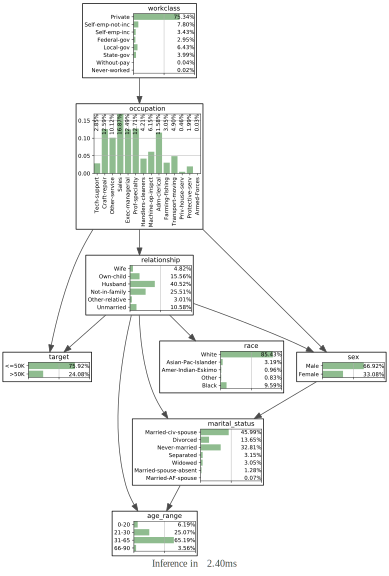

In [0]:
gnb.showInference(bn)

In [0]:
gnb.showPosterior(bn,evs={"sex": "Male", "age_range": '21-30'},target='target')

In [0]:
gnb.sideBySide(bn, gum.MarkovBlanket(bn, 'target'), captions=["Learned Bayesian Network", "Markov blanket of 'target'"])

In [0]:
ie=gum.LazyPropagation(bn)
init_belief(ie)
ie.addTarget('target')
result = testdf.apply(lambda x: is_well_predicted(ie, bn, 0.157935, x), axis=1)
result.value_counts(True)

True Negative     0.595745
False Positive    0.404255
dtype: float64

In [0]:
positives = sum(result.map(lambda x: 1 if x.startswith("True") else 0 ))
total = result.count()
print("{0:.2f}% good predictions".format(positives/total*100))

59.57% good predictions


In [0]:
showROC(bn,file, 'target', "True", True, True)